<a href="https://colab.research.google.com/github/Prabhusabharish/Graduate-Admission-Prediction/blob/main/Graduate_Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Admission/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [59]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [60]:
df.drop('Serial No.', axis=1, inplace=True)
df.sample(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
178,309,108,3,2.5,3.0,8.12,0,0.72
42,313,107,2,2.5,2.0,8.50,1,0.53


In [61]:
df.shape

(400, 8)

In [62]:
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [64]:
x = scaler.fit_transform(x)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.1 )

In [66]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [169]:
model = Sequential()

In [170]:
model.add(Dense(21,activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(1, activation = 'linear'))

In [171]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 21)                168       
                                                                 
 dense_38 (Dense)            (None, 1)                 22        
                                                                 
Total params: 190 (760.00 Byte)
Trainable params: 190 (760.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [172]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [173]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 10, verbose = 1, validation_split = 0.2)

Epoch 1/100
29/29 [==============================] - 1s 8ms/step - loss: 0.2629 - val_loss: 0.1616
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 0.1091 - val_loss: 0.1169
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0786 - val_loss: 0.0983
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.0826
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0477 - val_loss: 0.0714
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0614
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0334 - val_loss: 0.0528
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0289 - val_loss: 0.0467
Epoch 9/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.0416
Epoch 10/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0223 - val_loss: 0.0369
Epoch 11/

In [174]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [175]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6872197569352181

How to Improve model

In [164]:
#1. Increse the nos of epoch
#2. Increse nodes in the hiden layers
#3. Add more layers

In [165]:
# This model run to be overfitting

In [166]:
history.history

{'loss': [0.7040072679519653,
  0.4486265778541565,
  0.3626660108566284,
  0.3202560544013977,
  0.284790575504303,
  0.2563284933567047,
  0.22971585392951965,
  0.206664577126503,
  0.18603478372097015,
  0.16846129298210144,
  0.15186432003974915,
  0.13732656836509705,
  0.12420524656772614,
  0.11244925111532211,
  0.10232146084308624,
  0.09258389472961426,
  0.08378997445106506,
  0.07632030546665192,
  0.06949666887521744,
  0.06384614109992981,
  0.058616288006305695,
  0.05390277877449989,
  0.04966643825173378,
  0.04592256247997284,
  0.042225711047649384,
  0.03940333053469658,
  0.036477528512477875,
  0.034332312643527985,
  0.0322006456553936,
  0.030415691435337067,
  0.028745761141180992,
  0.027421480044722557,
  0.02611495740711689,
  0.024877408519387245,
  0.023737957701086998,
  0.022772546857595444,
  0.02177051641047001,
  0.020993879064917564,
  0.02012196183204651,
  0.019407205283641815,
  0.01882479153573513,
  0.018263671547174454,
  0.017688237130641937,

In [176]:
import matplotlib.pyplot as plt

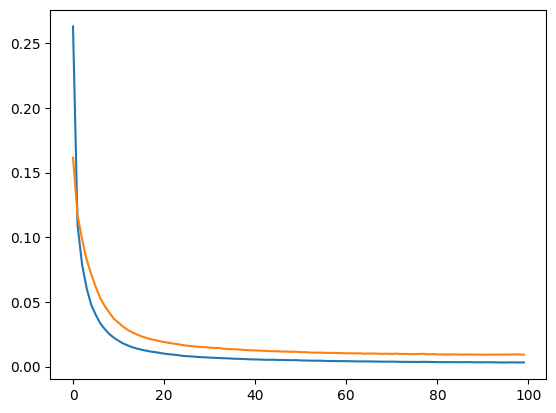

In [177]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])